# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
percentile95 = np.percentile(app_train['AMT_INCOME_TOTAL'], 95)
print(percentile95)
subset = app_train.loc[app_train['AMT_INCOME_TOTAL'] < percentile95, ['AMT_INCOME_TOTAL', 'TARGET', 'DAYS_BIRTH']]

337500.0


In [6]:
pd.qcut(subset['AMT_INCOME_TOTAL'], 10).value_counts()

ValueError: Bin edges must be unique: array([ 25650.,  81000.,  94500., 112500., 135000., 135000., 157500.,
       180000., 202500., 247500., 337050.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [7]:
pd.cut(subset['AMT_INCOME_TOTAL'], 10).value_counts()

(87930.0, 119070.0]     67876
(150210.0, 181350.0]    60305
(119070.0, 150210.0]    52045
(56790.0, 87930.0]      28095
(212490.0, 243630.0]    24600
(181350.0, 212490.0]    22154
(243630.0, 274770.0]    18116
(25338.6, 56790.0]       7275
(305910.0, 337050.0]     6690
(274770.0, 305910.0]     4530
Name: AMT_INCOME_TOTAL, dtype: int64

In [8]:
subset['AMT_INCOME_TOTAL_GROUP'] = pd.cut(subset['AMT_INCOME_TOTAL'], 10)

In [9]:
subset['AMT_INCOME_TOTAL_GROUP'].value_counts()

(87930.0, 119070.0]     67876
(150210.0, 181350.0]    60305
(119070.0, 150210.0]    52045
(56790.0, 87930.0]      28095
(212490.0, 243630.0]    24600
(181350.0, 212490.0]    22154
(243630.0, 274770.0]    18116
(25338.6, 56790.0]       7275
(305910.0, 337050.0]     6690
(274770.0, 305910.0]     4530
Name: AMT_INCOME_TOTAL_GROUP, dtype: int64

In [10]:
subset['YEARS_BIRTH'] = subset['DAYS_BIRTH']/365
subset['YEARS_BIRTH_GROUP'] = pd.cut(subset['DAYS_BIRTH']/365, 6)
subset['YEARS_BIRTH_GROUP'].value_counts()

(36.693, 44.781]    64364
(28.605, 36.693]    60177
(52.868, 60.956]    52662
(44.781, 52.868]    52229
(20.469, 28.605]    33324
(60.956, 69.044]    28930
Name: YEARS_BIRTH_GROUP, dtype: int64

In [11]:
subset.head()

,AMT_INCOME_TOTAL,TARGET,DAYS_BIRTH,AMT_INCOME_TOTAL_GROUP,YEARS_BIRTH,YEARS_BIRTH_GROUP
0,202500.0,1,9461,"(181350.0, 212490.0]",25.920548,"(20.469, 28.605]"
1,270000.0,0,16765,"(243630.0, 274770.0]",45.931507,"(44.781, 52.868]"
2,67500.0,0,19046,"(56790.0, 87930.0]",52.180822,"(44.781, 52.868]"
3,135000.0,0,19005,"(119070.0, 150210.0]",52.068493,"(44.781, 52.868]"
4,121500.0,0,19932,"(119070.0, 150210.0]",54.608219,"(52.868, 60.956]"


In [12]:
subset.dtypes

AMT_INCOME_TOTAL           float64
TARGET                       int64
DAYS_BIRTH                   int64
AMT_INCOME_TOTAL_GROUP    category
YEARS_BIRTH                float64
YEARS_BIRTH_GROUP         category
dtype: object

/Users/hychiu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


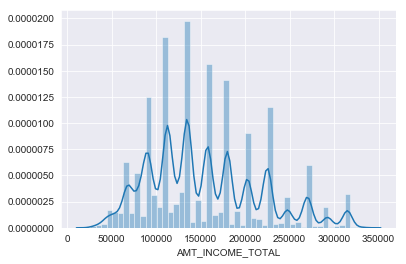

In [13]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(subset['AMT_INCOME_TOTAL'])

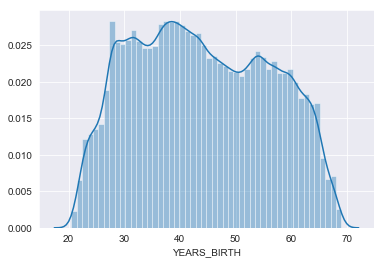

In [14]:
sns.distplot(subset['YEARS_BIRTH'])

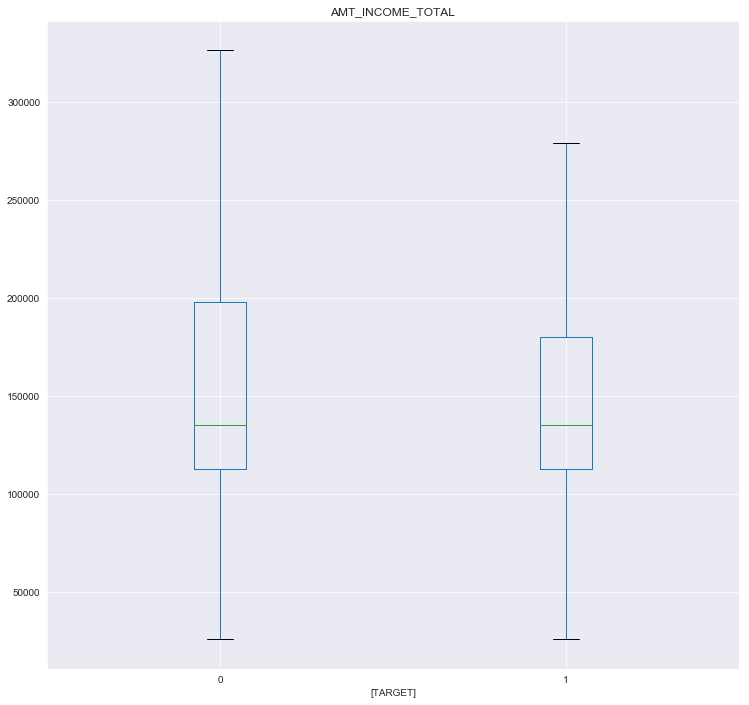

In [15]:
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['TARGET']

subset.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

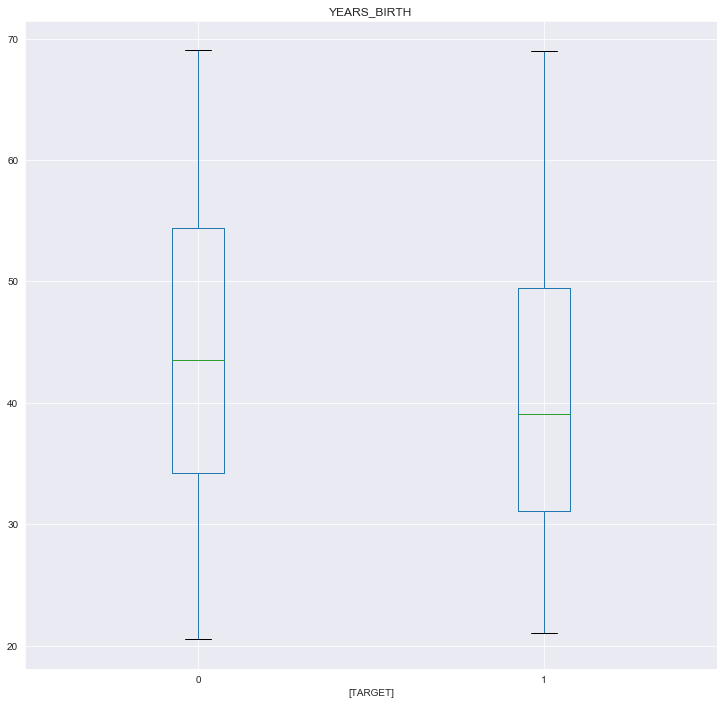

In [16]:
plt_column = ['YEARS_BIRTH']
plt_by = ['TARGET']

subset.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

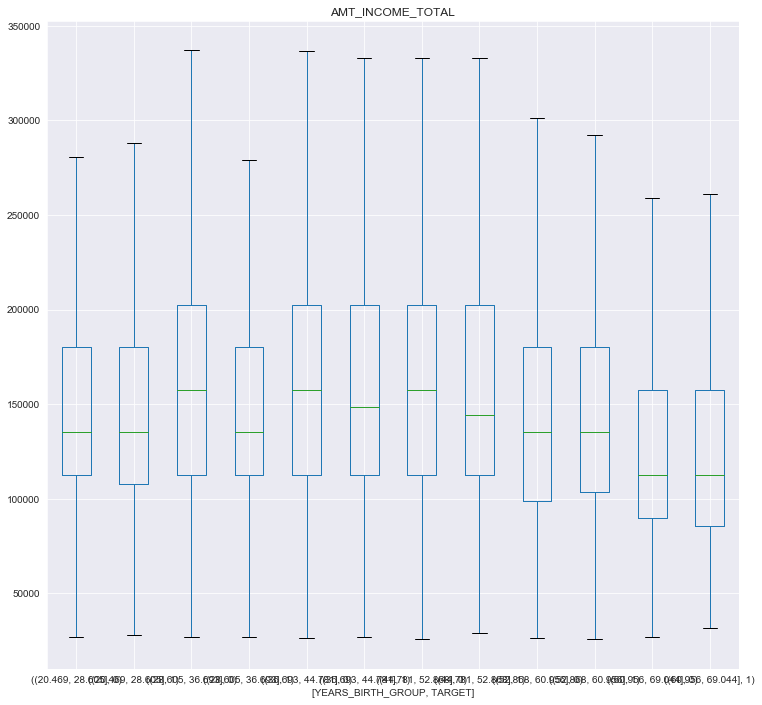

In [17]:
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['YEARS_BIRTH_GROUP', 'TARGET']

subset.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [18]:
subset.groupby(['TARGET', 'YEARS_BIRTH_GROUP'])['AMT_INCOME_TOTAL'].describe()

count           mean           std      min  \
TARGET YEARS_BIRTH_GROUP                                                  
0      (20.469, 28.605]   29444.0  148792.006223  57234.016404  27000.0   
       (28.605, 36.693]   53864.0  159438.759894  62140.994673  27000.0   
       (36.693, 44.781]   58964.0  161619.072755  63361.273925  26550.0   
       (44.781, 52.868]   48376.0  159087.718678  63407.704758  25650.0   
       (52.868, 60.956]   49636.0  147245.598990  63289.272670  26100.0   
       (60.956, 69.044]   27508.0  130148.310779  59442.136959  27000.0   
1      (20.469, 28.605]    3880.0  141890.130928  53809.528281  27900.0   
       (28.605, 36.693]    6313.0  151679.637415  58769.565977  27000.0   
       (36.693, 44.781]    5400.0  156567.141667  60972.465597  27000.0   
       (44.781, 52.868]    3853.0  156566.673371  62149.666539  29250.0   
       (52.868, 60.956]    3026.0  147750.519498  61320.383799  25650.0   
       (60.956, 69.044]    1422.0  127401.981013  56898.873308  31500.0   

                               25%       50%       75%         max  
TARGET YEARS_BIRTH_GROUP                                            
0      (20.469, 28.605]   112500.0  135000.0  180000.0  333751.500  
       (28.605, 36.693]   112500.0  157500.0  202500.0  337050.000  
       (36.693, 44.781]   112500.0  157500.0  202500.0  336835.935  
       (44.781, 52.868]   112500.0  157500.0  202500.0  333000.000  
       (52.868, 60.956]    99000.0  135000.0  180000.0  335700.000  
       (60.956, 69.044]    90000.0  112500.0  157500.0  333000.000  
1      (20.469, 28.605]   108000.0  135000.0  180000.0  336825.000  
       (28.605, 36.693]   112500.0  135000.0  180000.0  333000.000  
       (36.693, 44.781]   112500.0  148500.0  202500.0  333000.000  
       (44.781, 52.868]   112500.0  144000.0  202500.0  333000.000  
       (52.868, 60.956]   103500.0  135000.0  180000.0  333000.000  
       (60.956, 69.044]    85500.0  112500.0  157500.0  315000.000